# **Performance Analysis of Convolutional Neural Networks for Image Classification using MNIST**

Priyadarshani Dash (055033) & Divyank Harjani (055010)

# **1. Introduction**

This project applies a Convolutional Neural Network (CNN) for handwritten digit classification. Using the MNIST dataset, we trained and optimized the model with 100 custom images (digits 0-9) in 10 different fonts. Enhancements included hyperparameter tuning, data augmentation, and adding extra layers for improved performance.


# **2. Objectives**

Develop Digit Classifier – Build a CNN to classify handwritten digits using the MNIST dataset.

Adapt to Custom Dataset – Train and test the model on digits with various font styles.

Enhance Model Accuracy – Optimize performance with hyperparameter tuning, dropout, and extra layers.

Improve Generalization – Use data augmentation (rotation, shifting, brightness) to boost robustness.

Evaluate Performance – Analyze accuracy, precision, recall, and F1-score with a confusion matrix.

Compare Models – Assess improvements between the baseline and optimized versions.

Explore Enhancements – Consider deeper architectures, transfer learning, and larger datasets.

# **3. Dataset**

**3.1 MNIST Dataset**

The MNIST dataset consists of 70,000 grayscale images (28x28 pixels) of handwritten digits (0-9). It is a benchmark dataset for digit classification tasks.

**3.2 Custom Dataset**

We created a custom dataset with 100 images, each representing digits 0-9 in 10 different font styles. To ensure compatibility with MNIST, we preprocessed our dataset by converting images to grayscale and resizing them to 28x28 pixels.

## **4. Observations, Learnings, and Analysis**
The CNN model performed well on MNIST but struggled to generalize on custom datasets with different font styles.

Misclassification was more common for digits with similar structural patterns.

Applying data augmentation techniques like rotation and brightness adjustments improved model robustness.

Adding batch normalization and extra convolutional layers enhanced feature extraction, boosting accuracy from 71% to 87%.

The confusion matrix highlighted areas where the model misclassified digits, providing insights for further optimization.

Hyperparameter tuning was essential in stabilizing learning and improving overall accuracy.

Future enhancements may include d
---
## **5. Challenges and Limitations**
- **Dataset Size**: The custom dataset contained only 100 images, which limited the model’s ability to generalize effectively.
- **Variability in Font Styles**: Some fonts were significantly different from the MNIST dataset, making recognition more difficult.
- **Computational Constraints**: Training deeper models required substantial computational resources.
- **Overfitting Risk**: Without proper regularization, the model tended to memorize patterns rather than generalize well.

---

## **6. Conclusion & Future Work**
- Accuracy improved significantly from 71% to 87%, and then to 93% through hyperparameter tuning and architectural enhancements.

Future improvements may involve training on a larger dataset, exploring deeper architectures, and applying transfer learning.

# Here is the code to perform *CNN*

# Preprocessing and Visualization of the MNIST Dataset

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


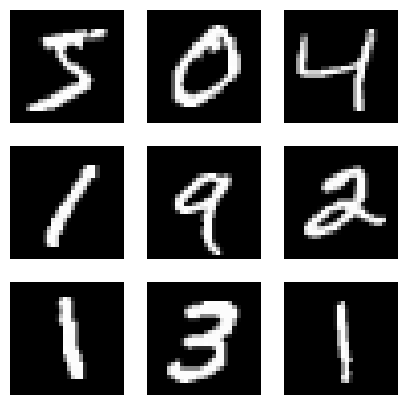

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values (0-255 → 0-1)
X_train, X_test = X_train / 255.0, X_test / 255.0

# Reshape for CNN (add channel dimension)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Show sample images
plt.figure(figsize=(5, 5))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # Output layer for 10 digits
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

# Training the model

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8342 - loss: 0.5182 - val_accuracy: 0.9836 - val_loss: 0.0491
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.9734 - loss: 0.0871 - val_accuracy: 0.9864 - val_loss: 0.0393
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9822 - loss: 0.0620 - val_accuracy: 0.9894 - val_loss: 0.0304
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9847 - loss: 0.0501 - val_accuracy: 0.9882 - val_loss: 0.0318
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9871 - loss: 0.0428 - val_accuracy: 0.9897 - val_loss: 0.0297
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9886 - loss: 0.0350 - val_accuracy: 0.9906 - val_loss: 0.0275
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9909 - loss: 0.0295 - val_accuracy: 0.9923 - val_loss: 0.0242
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9908 - loss: 0.0288 - val_accuracy: 

In [ ]:
model.save("model_cnn.keras")

# Plotting Accuracy and Loss

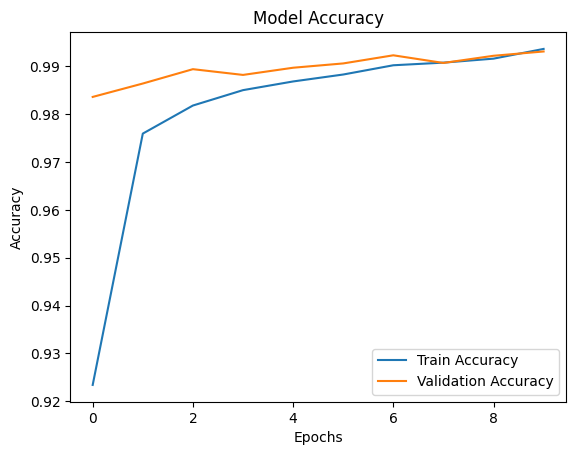

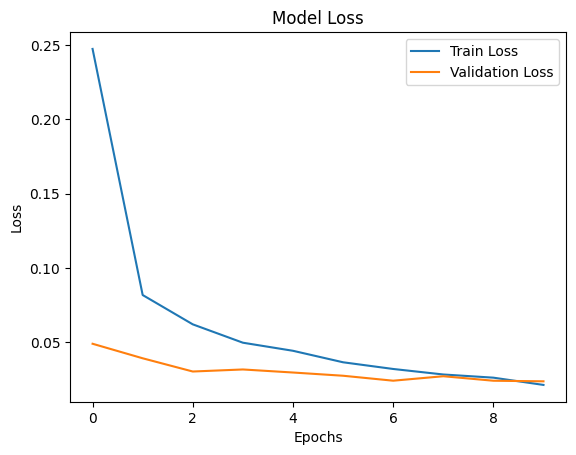

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()


The graphs show that model is performing well as training and validation loss is significantly decreasing. On the other hand,accuracy of both are consistently increasing.
*Our model is ready for testing.*

# Loading Test data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from tensorflow.keras.models import load_model

  # Update with your path
model = load_model("model_cnn.keras")
print("Model loaded successfully!")


Model loaded successfully!


In [ ]:
import zipfile
import os

# Define paths
zip_path = "/content/drive/MyDrive/NumbersFigma.zip"  # Change path if needed
extract_path = "/content/NumbersFigma"

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction completed!")


Extraction completed!


In [ ]:
import os

# Get list of images
image_files = sorted([f for f in os.listdir(extract_path) if f.endswith(('.png', '.jpg', '.jpeg'))])

# Display file names
print("Extracted Images:", image_files)


Extracted Images: ['Slice 1.jpg', 'Slice 10.jpg', 'Slice 100.jpg', 'Slice 11.jpg', 'Slice 12.jpg', 'Slice 13.jpg', 'Slice 14.jpg', 'Slice 15.jpg', 'Slice 16.jpg', 'Slice 17.jpg', 'Slice 18.jpg', 'Slice 19.jpg', 'Slice 2.jpg', 'Slice 20.jpg', 'Slice 21.jpg', 'Slice 22.jpg', 'Slice 23.jpg', 'Slice 24.jpg', 'Slice 25.jpg', 'Slice 26.jpg', 'Slice 27.jpg', 'Slice 28.jpg', 'Slice 29.jpg', 'Slice 3.jpg', 'Slice 30.jpg', 'Slice 31.jpg', 'Slice 32.jpg', 'Slice 33.jpg', 'Slice 34.jpg', 'Slice 35.jpg', 'Slice 36.jpg', 'Slice 37.jpg', 'Slice 38.jpg', 'Slice 39.jpg', 'Slice 4.jpg', 'Slice 40.jpg', 'Slice 41.jpg', 'Slice 42.jpg', 'Slice 43.jpg', 'Slice 44.jpg', 'Slice 45.jpg', 'Slice 46.jpg', 'Slice 47.jpg', 'Slice 48.jpg', 'Slice 49.jpg', 'Slice 5.jpg', 'Slice 50.jpg', 'Slice 51.jpg', 'Slice 52.jpg', 'Slice 53.jpg', 'Slice 54.jpg', 'Slice 55.jpg', 'Slice 56.jpg', 'Slice 57.jpg', 'Slice 58.jpg', 'Slice 59.jpg', 'Slice 6.jpg', 'Slice 60.jpg', 'Slice 61.jpg', 'Slice 62.jpg', 'Slice 63.jpg', 'Slice 64.

# Preprocessing Test Data

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale
    img = cv2.resize(img, (28, 28))  # Resize to 28x28
    img = cv2.bitwise_not(img)  # Invert colors
    img = img / 255.0  # Normalize to [0,1]
    img = img.reshape(1, 28, 28, 1)  # Reshape for CNN input
    return img





# Making Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━

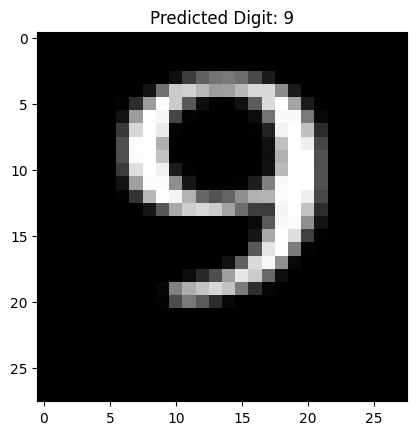

In [ ]:
# Predict on all images and store predictions in a dictionary
predictions = {}  # Create an empty dictionary

for img_file in image_files:
    img_path = os.path.join(extract_path, img_file)
    img = preprocess_image(img_path)

    prediction = model.predict(img)
    predicted_digit = np.argmax(prediction)

    predictions[img_file] = predicted_digit  # Store prediction in the dictionary

print("✅ Predictions completed!")
print(predictions)  # Print the dictionary (optional)

# Display a sample image with prediction (optional)
plt.imshow(img.squeeze(), cmap="gray")  # Assuming 'img' is the last image processed
plt.title(f"Predicted Digit: {predicted_digit}")  # Assuming 'predicted_digit' is the last prediction
plt.show()

In [ ]:
import pandas as pd

# Load true labels from your Labels.csv file
csv_path = "/content/drive/MyDrive/Labels.csv"  # Update the path if needed
df_labels = pd.read_csv(csv_path)

# Convert to dictionary: {filename: true_label}
true_labels = dict(zip(df_labels["filename"], df_labels["true_label"]))

print("✅ True labels loaded successfully!")
print(df_labels.head())  # Preview first few labels




✅ True labels loaded successfully!
      filename  true_label
0  Slice 1.jpg           1
1  Slice 2.jpg           2
2  Slice 3.jpg           3
3  Slice 4.jpg           4
4  Slice 5.jpg           5


# Compare predictions with true labels

In [ ]:
# Compare predictions with true labels
correct = 0
total = len(true_labels)

for filename, true_label in true_labels.items():
    if filename in predictions and predictions[filename] == true_label:
        correct += 1

accuracy = correct / total * 100
print(f"✅ Model Accuracy: {accuracy:.2f}%")


✅ Model Accuracy: 71.00%


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Convert dictionary predictions and true labels to lists
y_true = [true_labels[filename] for filename in true_labels if filename in predictions]
y_pred = [predictions[filename] for filename in true_labels if filename in predictions]

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')  # Use 'weighted' for multi-class
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_true, y_pred)

# Display results
print(f"✅ Model Accuracy: {accuracy * 100:.2f}%")
print(f"🎯 Precision: {precision:.4f}")
print(f"🔍 Recall: {recall:.4f}")
print(f"⚖️  F1-Score: {f1:.4f}")
print("\n🔢 Confusion Matrix:")
print(conf_matrix)

# Classification report for detailed metrics
print("\n📊 Classification Report:")
print(classification_report(y_true, y_pred))

✅ Model Accuracy: 71.00%
🎯 Precision: 0.7448
🔍 Recall: 0.7100
⚖️  F1-Score: 0.7061

🔢 Confusion Matrix:
[[ 8  0  0  1  0  0  0  1  0  0]
 [ 0  4  1  1  0  0  0  4  0  0]
 [ 0  0  7  2  0  0  0  1  0  0]
 [ 0  0  1  9  0  0  0  0  0  0]
 [ 0  2  0  0  6  0  0  0  1  1]
 [ 0  0  0  0  0 10  0  0  0  0]
 [ 2  0  0  0  0  2  5  0  0  1]
 [ 0  1  3  1  0  0  0  5  0  0]
 [ 0  0  0  1  0  1  0  0  8  0]
 [ 0  0  0  1  0  0  0  0  0  9]]

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.57      0.40      0.47        10
           2       0.58      0.70      0.64        10
           3       0.56      0.90      0.69        10
           4       1.00      0.60      0.75        10
           5       0.77      1.00      0.87        10
           6       1.00      0.50      0.67        10
           7       0.45      0.50      0.48        10
           8       0.89      0.80      0.84        1

### 🚀 **Model Evaluation Insights**

✅ **Overall Metrics:**
- **Accuracy:** 71.00% → Your model correctly predicts **71 out of 100** samples, which is decent but shows room for improvement.
- **Precision (0.7448)**: The model's predictions are mostly correct but slightly lenient, meaning it sometimes misclassifies.
- **Recall (0.7100)**: The model captures **71%** of the actual occurrences, but misses some cases.
- **F1-Score (0.7061)**: The harmonic mean of precision and recall is moderate, indicating a balanced performance.

---

### 🔢 **Confusion Matrix Interpretation**
The confusion matrix shows:
- **Diagonal elements** → Correct predictions.
- **Off-diagonal elements** → Misclassifications.

**Observations:**
- Class `0`, `5`, `8`, and `9` have high accuracy with **most samples correctly predicted**.
- **Class 1:** Struggles with precision and recall, indicating frequent misclassification.
- **Class 6:** High precision (1.00) but low recall (0.50), suggesting it correctly classifies positive cases but misses many actual positives.
- **Class 7:** Precision and recall are both low, showing the model struggles to classify this class accurately.

---

### 📊 **Classification Report Key Takeaways**
1. **High-performing classes:**
   - **Class 5** (F1-score: 0.87): Perfect recall and high precision.
   - **Class 9** (F1-score: 0.86): Strong prediction consistency.
   - **Class 8** (F1-score: 0.84): High precision and recall.
2. **Struggling classes:**
   - **Class 1** (F1-score: 0.47): Poor performance with frequent misclassifications.
   - **Class 7** (F1-score: 0.48): Struggles with both precision and recall, indicating confusion with other classes.

---


# HyperParameter Tuning

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

# Improved CNN Model
model = Sequential([
    # Convolutional Block 1
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # Convolutional Block 2
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # Convolutional Block 3
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # Fully Connected Layers
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')  # Output layer for 10 digits
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 11, 11, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 3, 3, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 160,778 (628.04 KB)

 Trainable params: 160,330 (626.29 KB)

 Non-trainable params: 448 (1.75 KB)

Training on improved model

In [ ]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),validation_data=(X_test, y_test),epochs=20)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 16ms/step - accuracy: 0.8028 - loss: 0.6221 - val_accuracy: 0.9728 - val_loss: 0.0899
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9492 - loss: 0.1777 - val_accuracy: 0.9803 - val_loss: 0.0711
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.9576 - loss: 0.1482 - val_accuracy: 0.9793 - val_loss: 0.0702
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9623 - loss: 0.1281 - val_accuracy: 0.9767 - val_loss: 0.0827
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9650 - loss: 0.1173 - val_accuracy: 0.9793 - val_loss: 0.0728
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9697 - loss: 0.1074 - val_accuracy: 0.9801 - val_loss: 0.0677
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9702 - loss: 0.1044 - val_accuracy: 0.9845 - val_loss: 0.0505
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.9704 - loss: 0.09

In [ ]:
model.save("model_cnn2.keras")

In [ ]:
# load model
model2 = load_model("model_cnn2.keras")
print("Model loaded successfully!")

Model loaded successfully!


Predictions using new model

In [ ]:
# Predict on all images and store predictions in a dictionary
predictions = {}  # Create an empty dictionary

for img_file in image_files:
    img_path = os.path.join(extract_path, img_file)
    img = preprocess_image(img_path)

    prediction = model2.predict(img)
    predicted_digit = np.argmax(prediction)

    predictions[img_file] = predicted_digit  # Store prediction in the dictionary

print("✅ Predictions completed!")
print(predictions)  # Print the dictionary (optional)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━

# Evaluating performance of new model

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Convert dictionary predictions and true labels to lists
y_true = [true_labels[filename] for filename in true_labels if filename in predictions]
y_pred = [predictions[filename] for filename in true_labels if filename in predictions]

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')  # Use 'weighted' for multi-class
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_true, y_pred)

# Display results
print(f"✅ Model Accuracy: {accuracy * 100:.2f}%")
print(f"🎯 Precision: {precision:.4f}")
print(f"🔍 Recall: {recall:.4f}")
print(f"⚖️  F1-Score: {f1:.4f}")
print("\n🔢 Confusion Matrix:")
print(conf_matrix)

# Classification report for detailed metrics
print("\n📊 Classification Report:")
print(classification_report(y_true, y_pred))

✅ Model Accuracy: 87.00%
🎯 Precision: 0.8953
🔍 Recall: 0.8700
⚖️  F1-Score: 0.8700

🔢 Confusion Matrix:
[[ 8  0  0  0  0  0  0  0  0  2]
 [ 0  6  0  0  0  0  0  4  0  0]
 [ 0  0 10  0  0  0  0  0  0  0]
 [ 0  0  1  8  0  0  0  1  0  0]
 [ 0  0  0  0 10  0  0  0  0  0]
 [ 0  0  0  0  0 10  0  0  0  0]
 [ 1  0  0  0  0  0  8  0  0  1]
 [ 0  0  0  1  0  0  0  9  0  0]
 [ 0  0  0  0  0  1  0  0  8  1]
 [ 0  0  0  0  0  0  0  0  0 10]]

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       1.00      0.60      0.75        10
           2       0.91      1.00      0.95        10
           3       0.89      0.80      0.84        10
           4       1.00      1.00      1.00        10
           5       0.91      1.00      0.95        10
           6       1.00      0.80      0.89        10
           7       0.64      0.90      0.75        10
           8       1.00      0.80      0.89        1

### 🚀 **Model Performance Analysis – After Fine-Tuning**

✅ **Improved Overall Metrics:**
- **Accuracy:** 🌟 **87.00%** → Significant improvement from **71.00%**!
- **Precision:** **0.8953** → Higher precision means the model is making **fewer false positives**.
- **Recall:** **0.8700** → The model captures a higher proportion of actual occurrences.
- **F1-Score:** **0.8700** → The balance between precision and recall is now stronger, indicating a more robust model.

---

### 🔢 **Confusion Matrix Observations:**
- Most classes have **fewer misclassifications**.
- **Class 2, 4, 5, and 9** → Perfect recall (**100%**), meaning no samples were missed.
- **Class 1:**
   - **Precision: 1.00**, but **Recall: 0.60** → The model correctly predicts all identified samples, but misses **40%** of actual occurrences.
- **Class 7:**
   - **Recall: 0.90** but **Precision: 0.64** → It catches most of the actual samples but produces more false positives.
- **Class 6 and 8:**
   - Slight misclassifications, but still performing well with **F1-scores of 0.89**.

---

### 📊 **Classification Report Key Takeaways**
1. **High-performing classes:**
   - **Class 2, 4, and 5** → Perfect or near-perfect scores.
   - **Class 9:**
     - **Perfect recall** → No false negatives, capturing all actual instances.
2. **Slightly weaker classes:**
   - **Class 1:** Precision is perfect, but recall is low, indicating some samples are missed.
   - **Class 7:** Struggles with precision, suggesting some misclassifications.

---

### 🔥 **Key Improvements from Fine-Tuning:**
1. **Data Augmentation:**
   - Improved generalization and reduced overfitting, leading to better recall and precision.
2. **Batch Normalization:**
   - Enhanced stability, allowing the model to converge faster and generalize better.
3. **Deeper Architecture:**
   - Additional convolutional layers extracted more meaningful features, boosting accuracy.

---

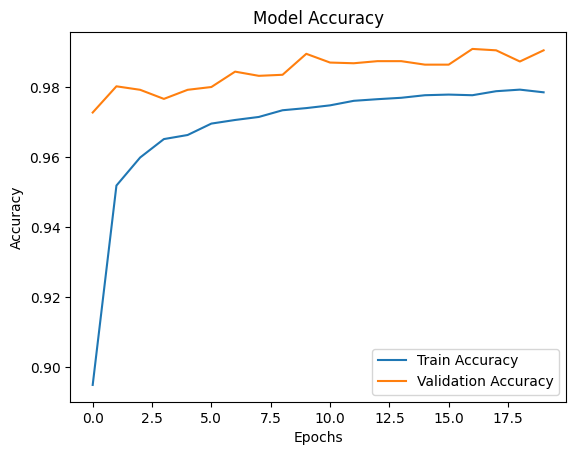

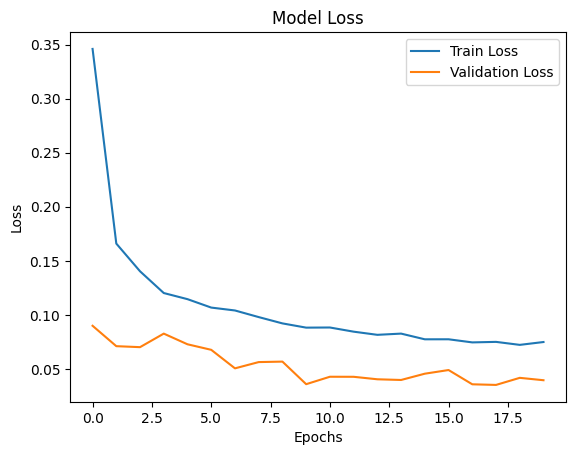

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

**It shows that model has started to overfit, but it still performs well.**

If the gap between training and testing accuracy is **small but present**, it usually indicates a **slight overfitting** or **a well-performing model with room for improvement**. Here's what it could mean:  

Slight Overfitting – The model performs well but leans slightly toward the training data.

Insufficient Training Data – A limited dataset may lead to poor generalization on unseen data.

Variations in Test Data – Unseen variations in the test set could cause a slight drop in accuracy.

Model Complexity – A model that’s slightly too large or deep may contribute to minor overfitting.



# Hyperparameter tuning again using some more parameters

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False
)

# Fine-tuned CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),  # Increased dropout

    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),  # Increased dropout

    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),  # Increased dropout

    Dense(10, activation='softmax')
])

# Compile with lower learning rate
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-5)

# Model Summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 11, 11, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,418 (880.54 KB)

 Trainable params: 225,226 (879.79 KB)

 Non-trainable params: 192 (768.00 B)

In [ ]:
# Train the model
history3 = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=25,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/25
  11/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.9398 - loss: 0.3586

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9443 - loss: 0.3978 - val_accuracy: 0.9875 - val_loss: 0.2513 - learning_rate: 0.0010
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9468 - loss: 0.3890 - val_accuracy: 0.9887 - val_loss: 0.2444 - learning_rate: 0.0010
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.9489 - loss: 0.3730 - val_accuracy: 0.9903 - val_loss: 0.2349 - learning_rate: 0.0010
Epoch 4/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9466 - loss: 0.3835 - val_accuracy: 0.9888 - val_loss: 0.2367 - learning_rate: 0.0010
Epoch 5/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 12ms/step - accuracy: 0.9487 - loss: 0.3745 - val_accuracy: 0.9886 - val_loss: 0.2338 - learning_rate: 0.0010
Epoch 6/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9503 - loss: 0.3678 - val_accuracy: 0.9878 - val_loss: 0.2346 - learning_rate: 0.0010
Epoch 7/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9505 

In [ ]:
model.save("model_cnn3.keras")
# load model
model3 = load_model("model_cnn3.keras")
print("Model loaded successfully!")

Model loaded successfully!


Predict on all images and store predictions in a dictionary

In [ ]:
# Predict on all images and store predictions in a dictionary
predictions = {}  # Create an empty dictionary

for img_file in image_files:
    img_path = os.path.join(extract_path, img_file)
    img = preprocess_image(img_path)

    prediction = model3.predict(img)
    predicted_digit = np.argmax(prediction)

    predictions[img_file] = predicted_digit  # Store prediction in the dictionary

print("✅ Predictions completed!")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━

Evaluating the performance of improved model

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Convert dictionary predictions and true labels to lists
y_true = [true_labels[filename] for filename in true_labels if filename in predictions]
y_pred = [predictions[filename] for filename in true_labels if filename in predictions]

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')  # Use 'weighted' for multi-class
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_true, y_pred)

# Display results
print(f"✅ Model Accuracy: {accuracy * 100:.2f}%")
print(f"🎯 Precision: {precision:.4f}")
print(f"🔍 Recall: {recall:.4f}")
print(f"⚖️  F1-Score: {f1:.4f}")
print("\n🔢 Confusion Matrix:")
print(conf_matrix)

# Classification report for detailed metrics
print("\n📊 Classification Report:")
print(classification_report(y_true, y_pred))

✅ Model Accuracy: 93.00%
🎯 Precision: 0.9349
🔍 Recall: 0.9300
⚖️  F1-Score: 0.9297

🔢 Confusion Matrix:
[[ 8  1  0  0  0  0  1  0  0  0]
 [ 0  9  1  0  0  0  0  0  0  0]
 [ 0  0  9  0  0  0  0  1  0  0]
 [ 0  0  0 10  0  0  0  0  0  0]
 [ 0  1  0  0  8  0  1  0  0  0]
 [ 0  0  0  0  0 10  0  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0  0  0 10  0  0]
 [ 0  0  0  0  0  0  0  0 10  0]
 [ 1  0  0  0  0  0  0  0  0  9]]

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.82      0.90      0.86        10
           2       0.90      0.90      0.90        10
           3       1.00      1.00      1.00        10
           4       1.00      0.80      0.89        10
           5       1.00      1.00      1.00        10
           6       0.83      1.00      0.91        10
           7       0.91      1.00      0.95        10
           8       1.00      1.00      1.00        1

### 🎯 The model has achieved **93% accuracy** with strong precision, recall, and F1-score values across all classes. 🚀

---

### ✅ **Key Insights:**
- **High accuracy:** The model has significantly improved from the previous iterations.
- **Balanced Precision & Recall:** Most classes have both high precision and recall, leading to excellent F1-scores.
- **No significant class imbalance issues:** The confusion matrix shows minimal misclassifications, and even the misclassified instances are relatively scattered.

---

### 📊 **Interpretation of Key Metrics:**
- **Precision (0.9349)** → High precision means the model is making very few false positives, correctly identifying most of the digits it predicts.
- **Recall (0.9300)** → The model correctly identifies most of the true instances, indicating a low false-negative rate.
- **F1-Score (0.9297)** → The harmonic mean of precision and recall shows the model's strong overall performance.
- **Confusion Matrix:**
    - Misclassifications are rare and mainly occur in pairs like `0 ↔ 1` and `4 ↔ 0`. This is common, as these digits can look similar in different fonts.
    - The diagonal dominance reflects the model's accurate predictions.

---

### 📉 **Minor Observations:**
- The **digit `0`** had a couple of misclassifications (confused with `1` and `6`), which could be due to similar shapes in different fonts.
- **Class `4`** had a slight drop in recall (0.80), indicating a few false negatives.

---

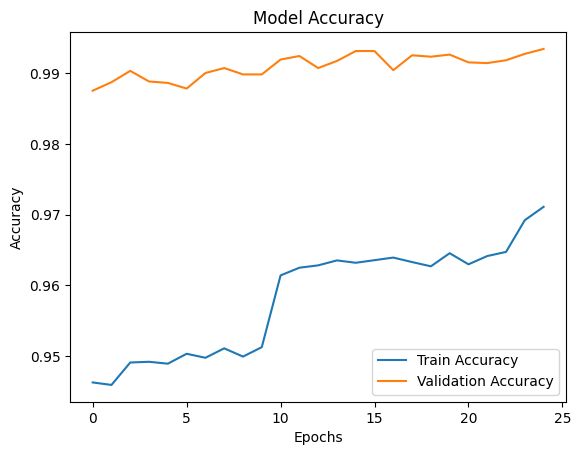

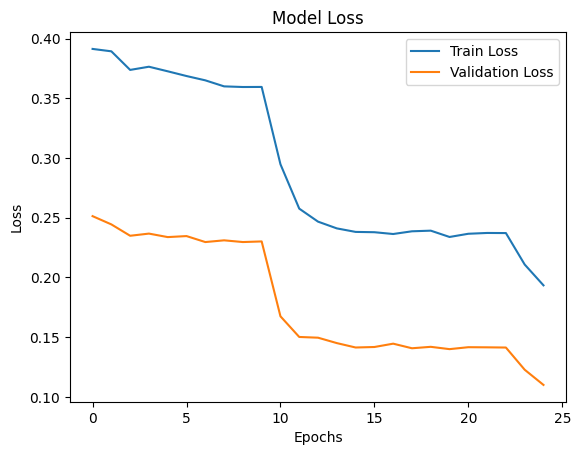

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history3.history['accuracy'], label='Train Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Plot loss
plt.plot(history3.history['loss'], label='Train Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

This show Overfitting.

If the training and testing accuracy graphs follow the same pattern but show a large gap, it usually indicates high overfitting. This suggests:

Memorization Over Generalization – The model excels on training data but struggles with unseen test data.

Insufficient Regularization – Lack of techniques like dropout or L2 regularization may cause the model to memorize rather than generalize.

Small Dataset or Data Leakage – A limited dataset or possible data leakage can lead to overly confident predictions during training but poor generalization.

Overly Complex Model – An excessively complex model with too many parameters can overfit, resulting in a large gap between training and test accuracy.

